In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('wordnet')

In [2]:
df = pd.read_csv(r'...')
df_sub=df.sample(500)

Text(0, 0.5, 'Frequency')

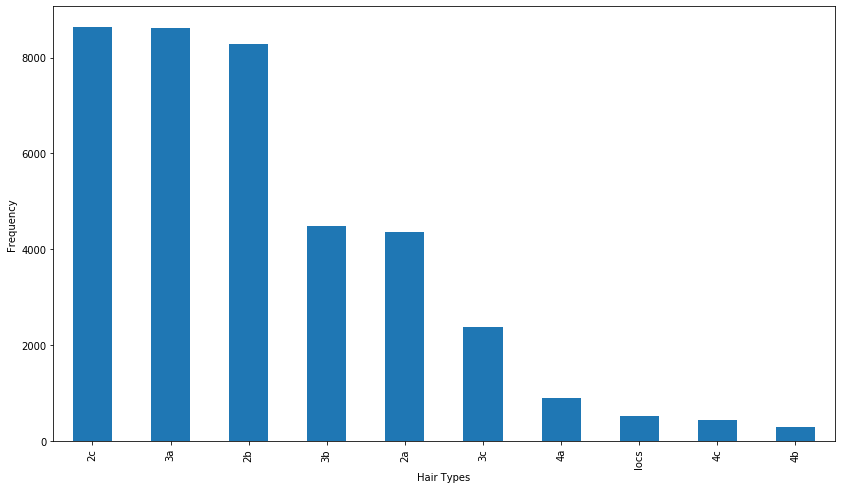

In [3]:
ax=df['hairtype'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel("Hair Types")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

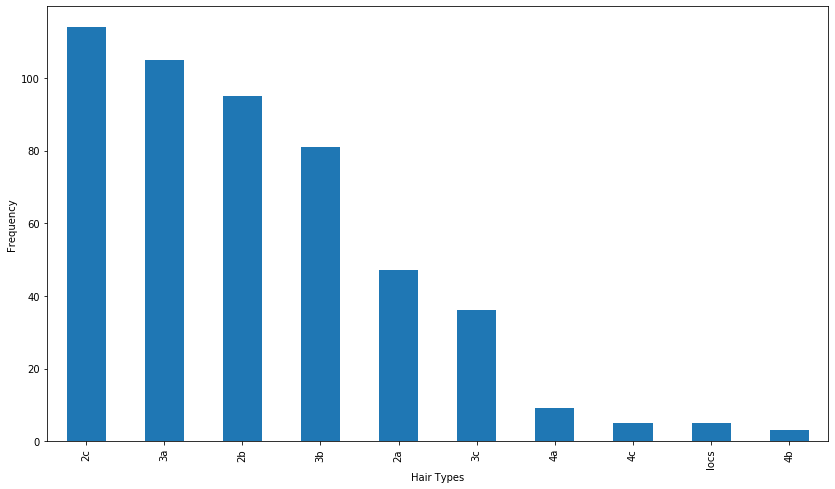

In [4]:
ax=df_sub['hairtype'].value_counts().plot(kind='bar',figsize=(14,8))
ax.set_xlabel("Hair Types")
ax.set_ylabel("Frequency")